<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
!pip install opencv-python

In [259]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [260]:
def stack_snake(img_arr,row_n,col_n=None):
    img_arr=np.array(img_arr)
    if col_n is None: col_n=row_n
    X = np.arange(row_n*col_n).reshape(row_n,col_n)
    for r in np.arange(1,row_n,2):
        X[r,:] = X[r,::-1]

    cat_rows = [np.concatenate(img_arr[X[r,:]],axis=1) for r  in range(row_n)]
    concat = np.concatenate(cat_rows,axis=0)
    return concat

def plot_img_grid( images , r,c=None):
    plt.imshow(stack_snake(images,row_n=r,col_n=c))

In [261]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [262]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)
z_planes = sorted(list(set(image_df['z'])))


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


In [263]:
!pip install stitching
from stitching import Stitcher


In [246]:
# z_planes = sorted(list(set(image_df['z'])))
# print(z_planes)

# for cur_z in [z_planes[15]]:
#     single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
# image_data_list = list()
# for path in single_plane_images:
#     image_data =cv2.imread(path)
#     image_data_list.append(image_data)
# order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
# image_data_list_sorted = [image_data_list[o] for o in order]

# fig,ax=plt.subplots(5,5)
# ax = ax.flatten()
# for i,f in enumerate(image_data_list_sorted):
#     ax[i].imshow(f)


# subset = image_data_list

In [247]:
# from stitching.images import Images
# paths = single_plane_images
# images = Images.of(paths)

In [248]:
# def plus_mask(img,n=.35,rs=None):
#     if rs is None:
#         rs = img.shape[:2]
#     mask = np.ones_like(img[:,:,0])
#     m_shape = np.shape(mask)
#     mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),:] = 0
#     mask[:,int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
#     # mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
#     mask = cv2.resize(mask, (rs[1],rs[0]))
#     return mask.astype(int)

# fig,ax=plt.subplots(1,figsize=(1,1))
# plt.imshow(plus_mask(img,n=.35))

In [249]:
# [:-1]
# len(subset)
# single_plane_images = single_plane_images[:-1]
# len(subset)

In [250]:
# from stitching.images import Images
# img = Images.of(subset, medium_megapix=0.96, low_megapix=0.1, final_megapix=-1)
# medium_imgs = list(img.resize(Images.Resolution.MEDIUM))
# subset = medium_imgs

# from stitching.feature_detector import FeatureDetector
# finder = FeatureDetector(detector='sift', nfeatures=500)

# features = [finder.detect_features(img, plus_mask(img,n=.35) ) for img in subset]

# from stitching.feature_matcher import FeatureMatcher
# matcher = FeatureMatcher()
# matches = matcher.match_features(features)
# matcher.get_confidence_matrix(matches)
# conf_mat = matcher.get_confidence_matrix(matches)

# fig,ax=plt.subplots(5,5,figsize=(8,8))
# ax = ax.flatten()
# for i,(img,feat) in enumerate(zip(subset,features)):
#     img_h = img.copy()
#     img_h[:,:,2] = plus_mask(img,n=.35)*255
#     ax[order[i]].imshow(img_h)
#     ax[order[i]].set_xticks([])
#     ax[order[i]].set_yticks([])
#     for k in feat.keypoints:
#         ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
#         ax[order[i]].set_title(i)


# conf_mat = matcher.get_confidence_matrix(matches)
# conf_mat[conf_mat==0]=np.nan
# fig,ax=plt.subplots(1,figsize=(5,5))
# cb=ax.imshow(conf_mat)
# plt.colorbar(cb)
# ax.grid('on')
# np.nanmin(conf_mat,1)

# from stitching.subsetter import Subsetter
# subsetter = Subsetter()
# dot_notation = subsetter.get_matches_graph([str(i) for i in range(25)], matches)
# print(dot_notation)



In [251]:

# fig,ax=plt.subplots(5,5,figsize=(8,8))
# ax = ax.flatten()
# for i,img in enumerate(warped_final_imgs):
#     ax[order[i]].imshow(img)
#     ax[order[i]].set_xticks([])
#     ax[order[i]].set_yticks([])
#     ax[order[i]].set_title(i)

In [252]:
# def plot_image(img, figsize_in_inches=(5,5)):
#     fig, ax = plt.subplots(figsize=figsize_in_inches)
#     ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

# def plot_images(imgs, figsize_in_inches=(5,5)):
#     fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
#     for col, img in enumerate(imgs):
#         axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

In [253]:
########################################## AFFINE ####################################################

In [274]:
def aff_stitch_og_size(my_images,img_paths,r,c=None,order=None):
    results = {}
    results['stitched'] = np.zeros([3,3,3],'uint8')




    from stitching.images import Images
    from stitching import AffineStitcher


    images = Images.of(list(img_paths))
    medium_imgs = list(images.resize(Images.Resolution.FINAL))
    low_imgs = list(images.resize(Images.Resolution.FINAL))
    final_imgs = list(images.resize(Images.Resolution.FINAL))


    """ INIT Stitcher """
    settings = { "confidence_threshold": 1.2}
    aff_stitcher = AffineStitcher(**settings)


    """ Feature Detection """
    features = aff_stitcher.find_features(my_images)
    results['features']=features
    num_feats = [len(f.keypoints) for f in results['features']]
    fewest_points = np.min(num_feats)
    results['fewest_points']=fewest_points
    if fewest_points < 25:
        results['message'] = 'no enough points'
        results['matches'] = np.nan
        results['cameras'] = np.nan
        return results
    ##
    # fig,ax=plt.subplots(5,5,figsize=(3,3))
    # ax = ax.flatten()
    # for i,(img,feat) in enumerate(zip(my_images,features)):
    #     img_h = img.copy()
    #     # img_h[:,:,2] = plus_mask(img,n=.35)*255
    #     ax[order[i]].imshow(img_h)
    #     ax[order[i]].set_xticks([])
    #     ax[order[i]].set_yticks([])
    #     for k in feat.keypoints:
    #         ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
    #         ax[order[i]].set_title(i)
    # plt.show()

    """ Matching """
    matches = aff_stitcher.match_features(features)
    results['matches']=matches
    conf_mat = aff_stitcher.matcher.get_confidence_matrix(matches)
    conf_mat[conf_mat==0]=np.nan
    indicies = aff_stitcher.subsetter.get_indices_to_keep(features,matches)
    dot_notation = aff_stitcher.subsetter.get_matches_graph([str(i) for i in range(25)], matches)
    ##
    # fig,ax=plt.subplots(1,figsize=(5,5))
    # cb=ax.imshow(conf_mat,vmin=0.5)
    # plt.colorbar(cb)
    # ax.grid('on')
    # np.nanmax(conf_mat,1)

    """ Solve Warp """
    cameras = aff_stitcher.camera_estimator.estimate(features, matches)
    cameras = aff_stitcher.camera_adjuster.adjust(features, matches, cameras)
    cameras = aff_stitcher.wave_corrector.correct(cameras)
    aff_stitcher.warper.set_scale(cameras)
    results['cameras']=cameras

    final_sizes = images.get_scaled_img_sizes(Images.Resolution.FINAL)
    camera_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)

    warped_final_imgs = list(aff_stitcher.warper.warp_images(final_imgs, cameras, camera_aspect))
    warped_final_masks = list(aff_stitcher.warper.create_and_warp_masks(final_sizes, cameras, camera_aspect))
    final_corners, final_sizes = aff_stitcher.warper.warp_rois(final_sizes, cameras, camera_aspect)
    ##
    # fig,ax=plt.subplots(5,5,figsize=(8,8))
    # ax = ax.flatten()
    # for i,img in enumerate(warped_final_imgs):
    #     ax[order[i]].imshow(img)
    #     # ax[order[i]].set_xticks([])
    #     # ax[order[i]].set_yticks([])
    #     ax[order[i]].set_title(i)


    # """ Cropping """
    cropped_final_imgs = warped_final_imgs
    cropped_final_masks = warped_final_masks
    # , final_corners, final_sizes

    # cropper = aff_stitcher.cropper
    # mask = cropper.estimate_panorama_mask(warped_final_imgs, warped_final_masks, final_corners, final_sizes)
    # lir = cropper.estimate_largest_interior_rectangle(mask)


    # final_corners = cropper.get_zero_center_corners(final_corners)
    # rectangles = cropper.get_rectangles(final_corners, final_sizes)
    # overlap = cropper.get_overlap(rectangles[1], lir)
    # intersection = cropper.get_intersection(rectangles[1], overlap)

    # cropper.prepare(warped_final_imgs, warped_final_masks, final_corners, final_sizes)

    # lir_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)  # since lir was obtained on low imgs
    # cropped_final_masks = list(cropper.crop_images(warped_final_masks, lir_aspect))
    # cropped_final_imgs = list(cropper.crop_images(warped_final_imgs, lir_aspect))
    # final_corners, final_sizes = cropper.crop_rois(final_corners, final_sizes, lir_aspect)

    """ Seams """
    seam_finder = aff_stitcher.seam_finder
    seam_masks = seam_finder.find(cropped_final_imgs, final_corners, cropped_final_masks)
    seam_masks_plots = [seam_finder.draw_seam_mask(img, seam_mask) for img, seam_mask in zip(cropped_final_imgs, seam_masks)]

    """ Exposure Comp """
    compensator = aff_stitcher.compensator
    compensator.feed(final_corners, cropped_final_imgs, cropped_final_masks)
    compensated_imgs = [compensator.apply(idx, corner, img, mask)
                        for idx, (img, mask, corner)
                        in enumerate(zip(cropped_final_imgs, cropped_final_masks, final_corners))]

    """ Blend """
    blender = aff_stitcher.blender
    blender.prepare(final_corners, final_sizes)
    for img, mask, corner in zip(compensated_imgs, seam_masks, final_corners):
        blender.feed(img, mask, corner)
    stitched, _ = blender.blend()
    results['stitched']=stitched
    return results


# results= aff_stitch_og_size(z_plane_image_data,z_plane_image_paths,r=5,order=order)
# plt.imshow(results['stitched'])

In [271]:
from tqdm import tqdm

In [ ]:
results_dict={}
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
# fig,ax = plt.subplots(1,figsize=(3,3))
for cur_z in tqdm(z_planes ):
    # try:
    z_plane_image_paths = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
    z_plane_image_data = [cv2.imread(path) for path in z_plane_image_paths]
    results= aff_stitch_og_size(z_plane_image_data,z_plane_image_paths,r=5,order=order)
    results_dict[str(cur_z)] = results
    # except:
    #     print('\nFailed')
    #     z_cams = list()
    #     stitched_plane = np.zeros((5,5))

    # ax.imshow(stitched_plane)
    # plt.show()
    # stich_list.append(results['stitched'])
    # cam_list.append(results['cameras'])

for k,v in results_dict.items():
    fig,ax = plt.subplots(1,figsize=(3,3))
    ax.imshow(v['stitched'])


In [304]:
len(results_dict['Z058']['cameras'])
a_camera=results_dict['Z058']['cameras'][9]
print('aspect',a_camera.aspect)
print('focal',a_camera.focal)
print('K()',a_camera.K())
print('R',a_camera.R)
print('ppx, ppy',a_camera.ppx, a_camera.ppy)
print('t',a_camera.t)




aspect 1.0
focal 1.0
K() [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
R [[ 9.9983907e-01  4.1941728e-04 -1.5445278e+00]
 [-4.1941728e-04  9.9983907e-01 -4.9972354e+02]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
ppx, ppy 0.0 0.0
t [[0.]
 [0.]
 [0.]]


In [330]:
zcam_list = list()
for z_plane,results in results_dict.items():
    if  isinstance(results['cameras'], float) :
        r_list = [np.eye(3)*np.nan for _ in range(len(results['features']))]
        zcam_list.append(r_list)
        continue

    r_list = [cam.R for cam in results['cameras']]
    zcam_list.append(r_list)

print(len(zcam_list))

114


In [334]:
stack_cams = np.stack(zcam_list)
stack_cams.shape

(114, 25, 3, 3)

In [394]:
def flatten_end(X):
    return  np.reshape(X,list(X.shape[:-2]) + [X.shape[-1]*X.shape[-2]])

In [ ]:
stack_cams_flat = flatten_end(flatten_end(stack_cams))
print(stack_cams_flat.shape)
np.nanstd(stack_cams_flat,axis=0)

center_cam = np.nanmedian(stack_cams_flat,axis=0)
std_cam = np.nanstd(stack_cams_flat,axis=0)

norm_stack_cams = np.divide(norm_stack_cams_flat-center_cam, std_cam,
                            out=np.zeros_like(norm_stack_cams_flat),where=std_cam!=0)


(vmin,vmax) = [10*d for d in [-1,1]]

fig,ax =plt.subplots(1,figsize=(10,10))
print(norm_stack_cams.shape)
cba = ax.pcolorfast(norm_stack_cams.T,vmin=vmin,vmax=vmax)
ax.set_xlabel('Z-Plane')
ax.set_ylabel('Camera_param')
plt.colorbar(cba)
# plt.show()

In [496]:

print(norm_xy_cam_stack)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


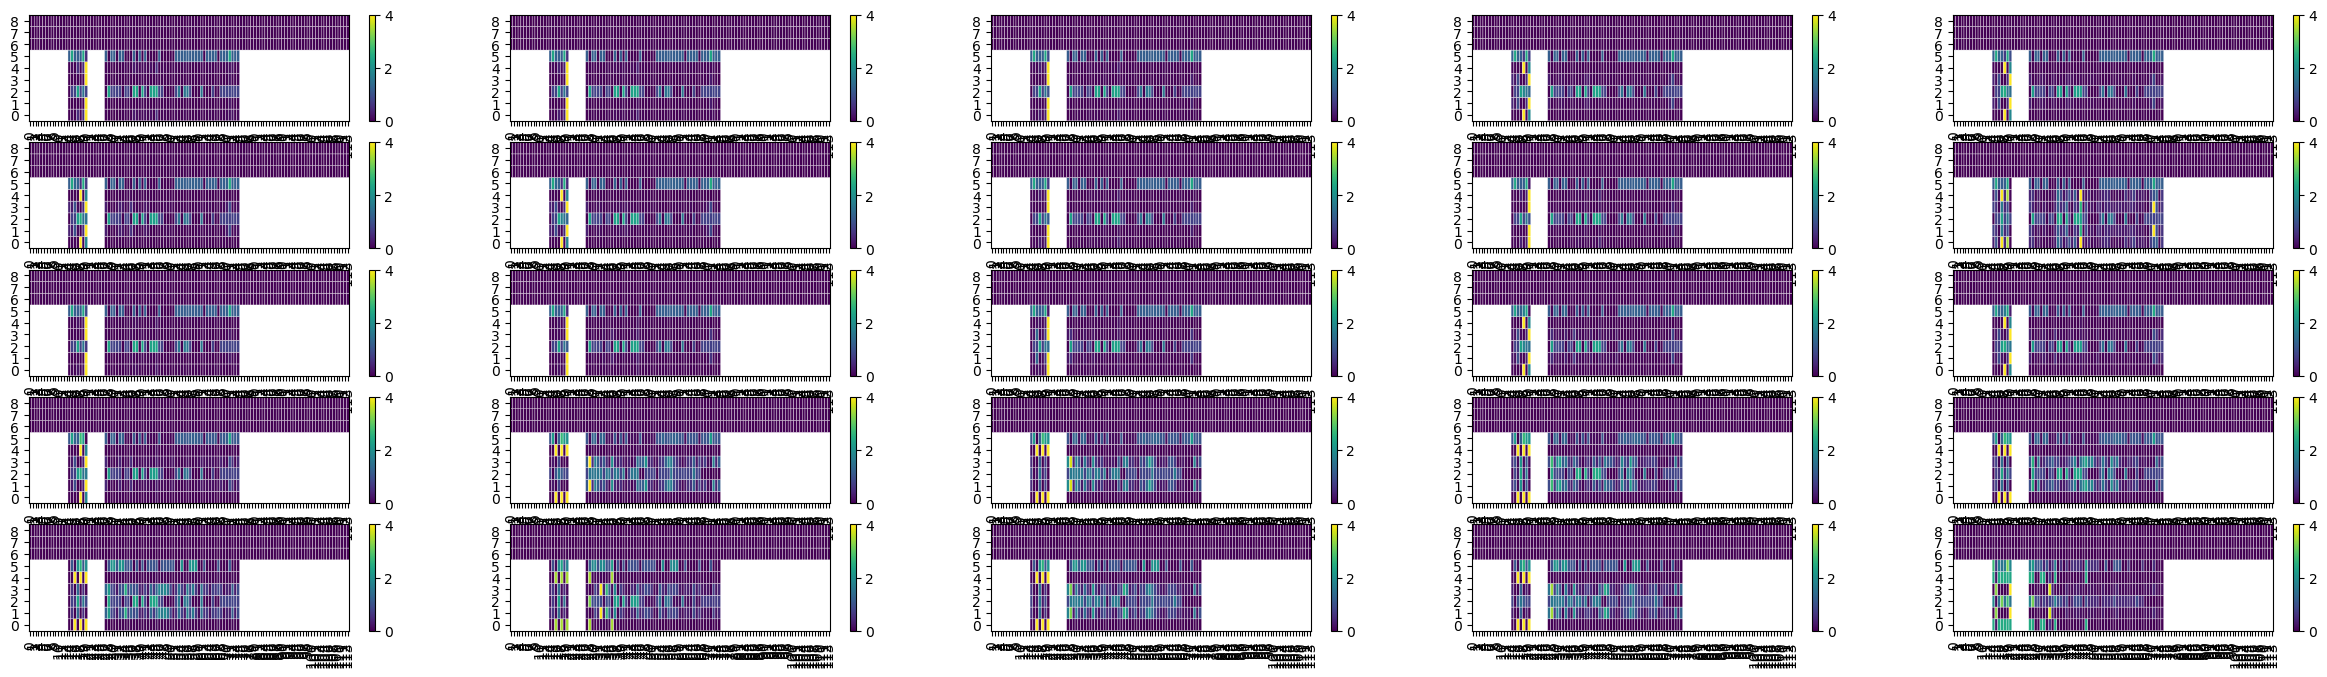

In [531]:
stack_cams.shape

cam_centers=np.nanmedian(stack_cams,axis=0)
cam_stds = np.nanstd(stack_cams,axis=0)

norm_cam_stack = np.divide(stack_cams-cam_centers,cam_stds,
                           out=np.zeros_like(stack_cams),
                           where=cam_stds!=0)


fig,ax=plt.subplots(5,5,figsize=(30,8))
ax=ax.flatten()
(vmin,vmax) = [4*d for d in [-1,1]]
for ax_i,c_ind in zip(ax,range(norm_cam_stack.shape[1])):
    xy_cam = norm_cam_stack[:,c_ind,...]
    xy_cam = flatten_end(xy_cam)
    cbh=ax_i.pcolor(abs(xy_cam.T),edgecolors='w',vmin=0,vmax=vmax)
    ax_i.set_yticks(np.arange(9)+.5,range(9))
    ax_i.set_xticks(np.arange(114)+.5,range(114),rotation=90)
    plt.colorbar(cbh)


In [525]:
norm_cam_stack.shape

(114, 25, 3, 3)